In [1]:
import numpy as np

In [2]:
def sigmoid(x):
    return np.exp(x) / (np.exp(x) + 1)

In [3]:
class Logistic:
    
    def __init__(self, rate=0.01, cycles=10000):
        self.rate = rate
        self.cycles = cycles
    
    def run(self, points, ids):
        self.theta = np.zeros(np.size(points[0]))
        self.bias = 0.5
        
        self.loss = np.zeros(self.cycles)
        
        for i in range(self.cycles):
            for point, truth in zip(points, ids):
                error = truth - self.predict(point)
                if error != 0:
                    self.compute_loss(i, point, truth)
                
                shift = abs(error) * self.rate
                dot = np.dot(point, self.theta) + self.bias
                self.bias -= shift * (sigmoid(dot) - truth)
                self.theta -= shift * point * (sigmoid(dot) - truth)
        
        self.report(points, ids)
        return self
    
    def compute_loss(self, i, x, y):
        dot = np.dot(x, self.theta)
        self.loss[i] -= y * np.log(sigmoid(dot)) + (1 - y) * np.log(sigmoid(-1 * dot))
    
    def predict(self, ds):
        return np.where(sigmoid(np.dot(ds, self.theta)) + self.bias > 0.5, 1, 0)
    
    def report(self, points, ids):
        miss = []
        for point, truth in zip(points, ids):
            prediction = self.predict(point)
            if truth - prediction != 0:
                miss.append([point, prediction, truth])
        if len(miss) > 0:
            print("Mislabeled:")
            for c in miss:
                print("{0}, prediction: {1}, truth: {2}".format(c[0], c[1], c[2]))

In [4]:
log = Logistic()

In [5]:
data = np.load('Data6/data.npz')
x = data['x']
y = data['y']
print(x)
print(y)

[[-0.31614901  1.87605657  1.44811891  0.32817385]
 [ 2.47446151  1.01092948  0.79865044  1.00262546]
 [ 1.75279944 -1.52206849 -0.03133356  0.96695073]
 [ 1.70404679  1.13011281  1.22739355  0.04459299]
 [ 1.98584207  1.10147818  1.20268202 -0.43239983]
 [ 0.76420018  0.85763642  1.24111019 -1.27955966]
 [-0.01706837  1.09825248  0.46900371  0.55239361]
 [ 0.99235873  1.71183395  1.78633591  2.80797428]
 [ 1.34429235  1.06651845  1.631352    0.99906764]
 [ 2.46810471  0.46356975  0.74726428  0.14156749]
 [ 2.1213611   1.45556037  0.40068621  0.56334793]
 [ 1.57219761  1.44814411  0.67527587 -0.14375625]
 [ 0.72035419  1.97134466  0.59783723  0.67200369]
 [ 2.27026646  1.76715083  2.68380618  0.37930457]
 [ 1.35243807  2.34200231 -0.04403105  0.75554362]
 [ 1.38094499  1.07190912  0.63622245  2.53550602]
 [ 0.87556363  1.18316115  0.68534397 -0.79322208]
 [ 0.89211314  0.54093417  0.03936654  2.33130998]
 [ 2.29152831  0.39987078  0.94616961 -0.59047673]
 [ 1.13162603  1.04564062  1.10

In [6]:
out = log.run(x,y)

Mislabeled:
[-0.31614901  1.87605657  1.44811891  0.32817385], prediction: 1, truth: 0
[2.46810471 0.46356975 0.74726428 0.14156749], prediction: 1, truth: 0
[ 1.57219761  1.44814411  0.67527587 -0.14375625], prediction: 1, truth: 0
[0.72035419 1.97134466 0.59783723 0.67200369], prediction: 1, truth: 0


In [7]:
print(out.theta)

[ 0.01406028  0.03614788 -0.04154139 -0.04592305]


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

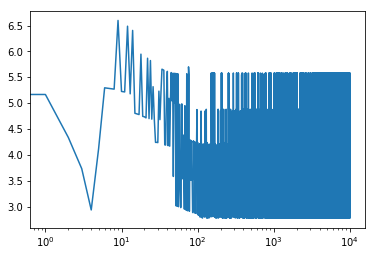

In [9]:
plt.plot(out.loss)
plt.xscale('log')

ValueError: Filler values must be provided when X has more than 2 training features.

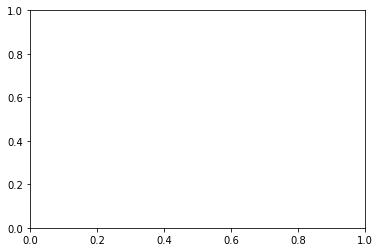

In [10]:
plot_decision_regions(x, y, clf=log)